# Problema 3:
Considere una barra con una carga axial aplicada de T= -20 N/cm2
, como se muestra en la figura.
Determine el desplazamiento axial y la tensión. Tome E = 210 GPa, A = 10 cm2
 y L = 1.50 m. Use
primero uno y luego dos elementos. Intente generalizarlo a n elementos y compare sus resultados
con la solución teórica:

$ d(x) = \frac{|T|}{6 A E}(x^3 - L^3) $ 

$\sigma (x)= \frac{|T|}{6 A} x^2  $

$T(x)=Cx$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# simplemente para que se vea en mi fondo oscuro:
plt.style.use('seaborn')
plt.rc('figure', figsize=(15,10))
plt.rc('axes',labelsize=24)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.rc('legend', fontsize=18)

In [6]:
import copy
GL = 1
C = -20   # N/cm2
E = 210e9 # GPa
A = 10 # cm2
L = 150  # cm
elementos=10
Dteo= lambda x: (abs(C)/(6*A*E))*(x**3 - L**3)
Steo= lambda x: (abs(C)/(2*A)) * (x**2)

In [7]:
def barra(elementos, L, A, E, C, GL=1):
    N = elementos + 1
    KG= np.zeros((N,N))         # Matriz de rigidez global
    KL = np.array([[1,-1],[-1,1]])   # Matriz de rigidez local
    K = (N-1)*E*A/L
    F=np.zeros(N*GL)
    t=np.zeros(N-1)
    D=np.zeros(N*GL)
    n = np.linspace(0, L, N)
    Ftot=C* (n[1]**2 - n[0]**2) / 2
    

    for i in range(elementos):
        F[i] += Ftot/3 +  ((n[i+1]-n[i])*n[i]*C)/2
        F[i+1] += Ftot*2/3  +  ((n[i+1]-n[i])*n[i]*C)/2
        KG[i:i+GL+1, i:i+GL+1]+= K*KL

    D[0:elementos]=np.linalg.solve(KG[np.ix_(np.arange(N-1), np.arange(N-1))],F[np.arange(N-1)])
    R=np.dot(KG[N-1,np.arange(N)] , D) - F[N-1]
    
    for i in range(len(D)-1):
        t[i]=E* np.dot([-(N-1)/L,(N-1)/L], D[i:i+2])   
    return n, D, t, F

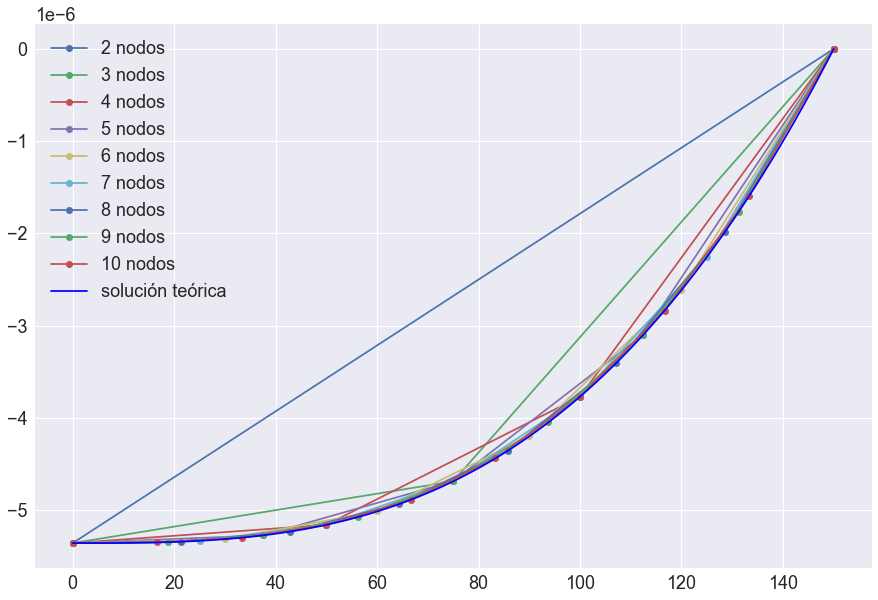

In [15]:
for i in range(1,10):
    elementos=i
    n, D, t, F= barra(elementos, L, A, E, C)
    #MDF_COMMENT     plt.plot(n,D, 'r')
    plt.plot(n, D,'-o', label='{} nodos'.format(len(n)))
plt.plot(np.linspace(0,L,100), Dteo(np.linspace(0,L,100)), 'b', label='solución teórica')
plt.legend()


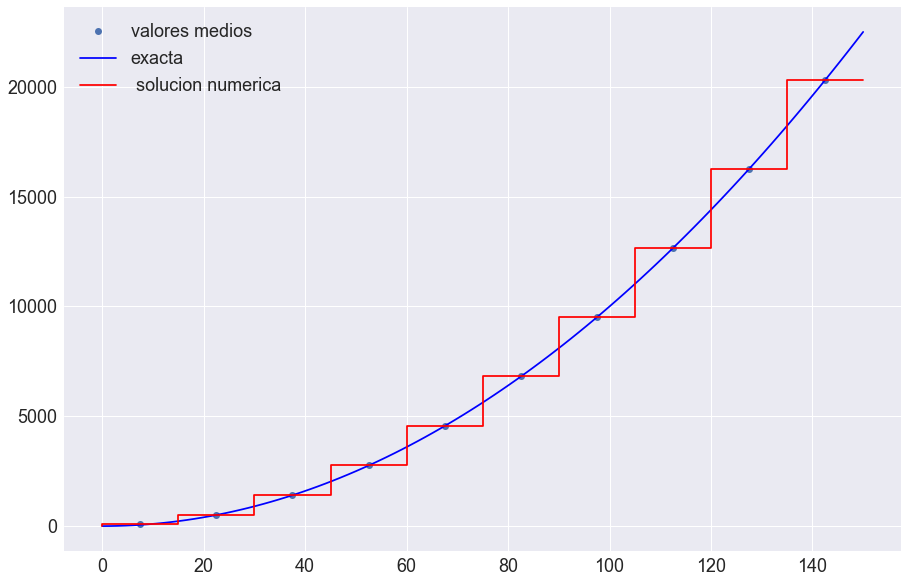

In [16]:
n, D, t, F = barra(10, L, A, E, C)
x=np.linspace(0,L-(L/(10)), 10) + (L/(10*2))
plt.plot(x,t, 'o', label = 'valores medios')
plt.plot(np.linspace(0,L,100), Steo(np.linspace(0,L,100)), 'b', label= 'exacta')
TENY = np.hstack( ([0.0], t) )
plt.step(np.linspace(0,L,10+1),TENY,'r',where = 'pre', label = ' solucion numerica')
plt.legend()


![Dumbledore llevame ...](https://media.giphy.com/media/Swx36wwSsU49HAnIhC/giphy.gif)